In [55]:
### SGD ###
import torch
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(1)

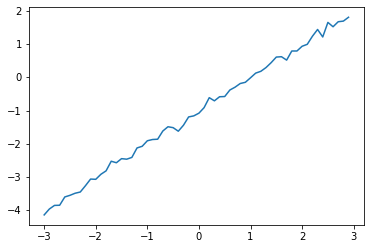

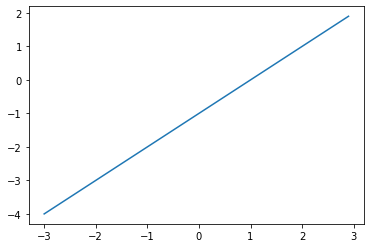

In [56]:
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1
Y = f + 0.1 * torch.randn(X.size())

plt.plot(X.numpy(), Y.numpy())
plt.show()

plt.plot(X.numpy(), f.numpy())
plt.show()

In [57]:
def forward(x):
    return w * x + b

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [58]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

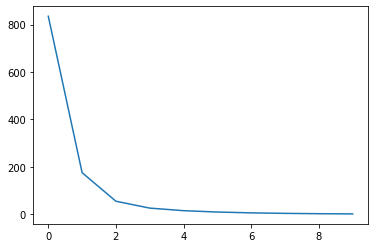

In [59]:
lr = 0.1
LOSS_BGD = []

def train_model(iter):
    for epoch in range(iter):
        Yhat = forward(X)
        loss = criterion(Yhat, Y)
        LOSS_BGD.append(loss)
        loss.backward()
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()

    plt.plot(LOSS_BGD)
    plt.show()

train_model(10)

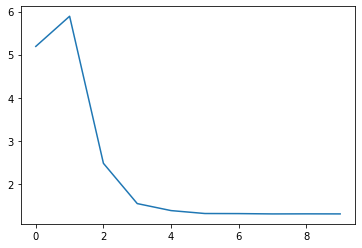

In [60]:
LOSS_SGD = []

def train_model_SGD(iter):
    for epoch in range(iter):
        total = 0
        for x, y in zip(X, Y):
            yhat = forward(x)
            loss = criterion(yhat, y)
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
            total += loss.item()
        LOSS_SGD.append(total)

    plt.plot(LOSS_SGD)
    plt.show()

train_model_SGD(10)

In [61]:
from torch.utils.data import Dataset, DataLoader

In [62]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1 * self.x - 1
        self.len = self.x.shape[0]

    def __getitem__(self,index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In [64]:
dataset = Data()
print(f"len={len(dataset)}")

len=60


In [65]:
x, y = dataset[0]
print(f"x={x}, y={y}")

x=tensor([-3.]), y=tensor([-4.])


In [66]:
trainloader = DataLoader(dataset = dataset, batch_size = 1)

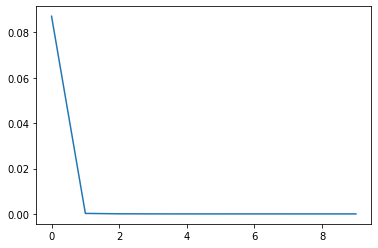

In [67]:
LOSS_LOADER = []

def train_model_dataloader(epochs):
    for epoch in range(epochs):
        total = 0
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
            total += loss.item()
        LOSS_LOADER.append(total)

    plt.plot(LOSS_LOADER)
    plt.show()

train_model_dataloader(10)

In [70]:
minibatch = DataLoader(dataset = dataset, batch_size = 5)

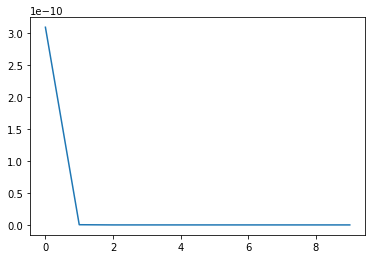

In [71]:
MINI_BATCH = []

def train_model_minibatch(epochs):
    for epoch in range(epochs):
        total = 0
        for x, y in minibatch:
            yhat = forward(x)
            loss = criterion(yhat, y)
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
            total += loss.item()
        MINI_BATCH.append(total)

    plt.plot(MINI_BATCH)
    plt.show()

train_model_minibatch(10)